In [1]:
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from roboflow import Roboflow
import zipfile
import os
import json
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
load_dotenv()

# Get the API key from the environment variable
api_key = os.getenv('ROBOFLOW_API_KEY')

In [4]:
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
version = project.version(3)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Car-3 in coco:: 100%|██████████| 29804/29804 [00:29<00:00, 1021.28it/s]


In [7]:
# Preprocess images and annotations
data_dir = "Self-Driving-Car-3"
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [8]:
%pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


In [10]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [11]:
# Initialize COCO object
coco = COCO('Self-Driving-Car-3\export\_annotations.coco.json')

invalid escape sequence '\e'
invalid escape sequence '\e'
invalid escape sequence '\e'


loading annotations into memory...
Done (t=1.89s)
creating index...
index created!


In [20]:
# Load an example image
img_id = coco.getImgIds()[0]
img_info = coco.loadImgs(img_id)[0]
img_path = 'Self-Driving-Car-3/export/' + img_info['file_name']
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
print(img_info)

{'id': 0, 'license': 1, 'file_name': '1478897026627294725_jpg.rf.6828a4e821cbab4c2c277d74df291f00.jpg', 'height': 512, 'width': 512, 'date_captured': '2021-06-09T12:24:25+00:00'}


In [21]:
# Load annotations
anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id))

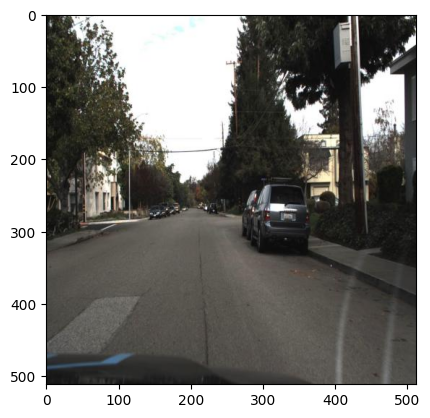

In [22]:
# Plot the image
plt.imshow(img)
ax = plt.gca()

In [30]:
# Overlay annotations
for ann in anns:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

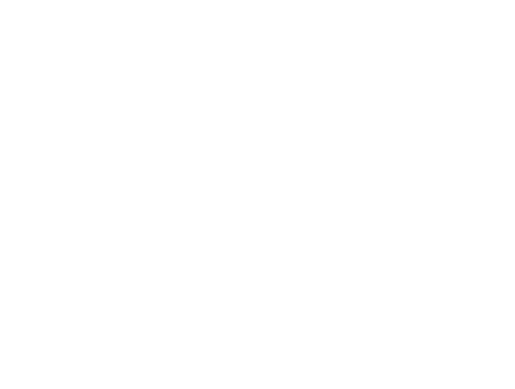

In [31]:
plt.axis('off')
plt.show()

In [27]:
print(anns)

[{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [140, 262, 21, 25.5], 'area': 535.5, 'segmentation': [], 'iscrowd': 0}, {'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [266, 231, 24, 95.5], 'area': 2292, 'segmentation': [], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 2, 'bbox': [271, 241, 17, 76], 'area': 1292, 'segmentation': [], 'iscrowd': 0}, {'id': 3, 'image_id': 0, 'category_id': 2, 'bbox': [280, 220, 89.5, 121], 'area': 10829.5, 'segmentation': [], 'iscrowd': 0}]


In [28]:
for ann in anns:
    bbox = ann['bbox']
    print(bbox)

[140, 262, 21, 25.5]
[266, 231, 24, 95.5]
[271, 241, 17, 76]
[280, 220, 89.5, 121]


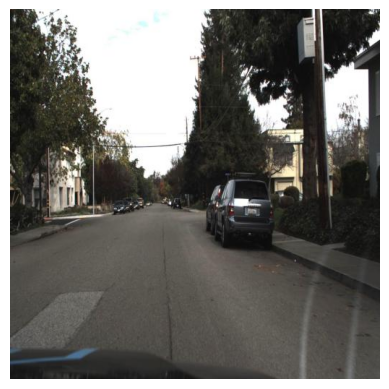

In [29]:
plt.imshow(img)
plt.axis('off')
plt.show()